In [2]:
import numpy as np

In [3]:
def read_dic(path, aniso=False):
    dictionary = np.load(path, allow_pickle=True)
    t = np.real(dictionary.item()["t"])
    f = np.real(dictionary.item()["f"])
    R1 = np.real(dictionary.item()["R1"])
    R2 = np.real(dictionary.item()["R2"])
    if aniso:
        C1 = np.real(dictionary.item()["C1"])
        C2 = np.real(dictionary.item()["C2"])
        C3 = np.real(dictionary.item()["C3"])
        return t, f, C1, C2, C3, R1, R2
    else:
        C = np.real(dictionary.item()["C"])
        return t, f, C, R1, R2

In [4]:
def append_data(t, f, gij, R1, R2, all_t, all_f, all_gij, all_R1, all_R2):
    all_t.append(t)
    all_f.append(f)
    all_gij.append(gij)
    all_R1.append(R1)
    all_R2.append(R2)
    return all_t, all_f, all_gij, all_R1, all_R2

In [5]:
def extract_R0(R1_vs_x):
    R10_vs_x = []
    for R1 in R1_vs_x:
        R10_vs_x.append(np.mean(R1[0]))
    R10_vs_x = np.float32(R10_vs_x)
    return R10_vs_x

In [6]:
import sys, os, git
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
sys.path.append(git_path+"/examples/pyplot-perso/")
from color_series1 import colors
from functions import complete_panel, save_figure, set_boundaries, add_subplotlabels, set_boundaries
path_figures = "/docs/source/figures/illustrations/bulk-water/"

In [7]:
from matplotlib import pyplot as plt

# Varying temperature

In [8]:
Krynicki66 = np.loadtxt("bulk-water/literature_data/T1_vs_T_Krynicki66a.dat")
svirmickas73 = np.loadtxt("bulk-water/literature_data/T1_vs_T_svirmickas73a.dat")

In [9]:
all_T = []
R1_intra_vs_T = []
R2_intra_vs_T = []
gij_intra_vs_T = []
f_vs_T = []
t_vs_T = []
R1_inter_vs_T = []
R2_inter_vs_T = []
gij_inter_vs_T = []
for T in ["T280K", "T290K", "T300K", "T310K", "T320K"]:
    t, f, gij, R1, R2 = read_dic("bulk-water-tip4p-vs-temperature/raw_data/N4000_intra_"+T+".npy")
    t_vs_T, f_vs_T, gij_intra_vs_T, R1_intra_vs_T, R2_intra_vs_T = append_data(t, f, gij, R1, R2, t_vs_T, f_vs_T, gij_intra_vs_T, R1_intra_vs_T, R2_intra_vs_T)
    t, f, gij, R1, R2 = read_dic("bulk-water-tip4p-vs-temperature/raw_data/N4000_inter_"+T+".npy")
    t_vs_T, f_vs_T, gij_inter_vs_T, R1_inter_vs_T, R2_inter_vs_T = append_data(t, f, gij, R1, R2, [], [], gij_inter_vs_T, R1_inter_vs_T, R2_inter_vs_T)
    all_T.append(np.int32(T[1:-1]))
all_T = np.array(all_T)
R10_inter_vs_T = extract_R0(R1_inter_vs_T)
R20_inter_vs_T = extract_R0(R2_inter_vs_T)
R10_intra_vs_T = extract_R0(R1_intra_vs_T)
R20_intra_vs_T = extract_R0(R2_intra_vs_T)

In [16]:
all_T3 = []
R1_intra_vs_T3 = []
R2_intra_vs_T3 = []
gij_intra_vs_T3 = []
f_vs_T3 = []
t_vs_T3 = []
R1_inter_vs_T3 = []
R2_inter_vs_T3 = []
gij_inter_vs_T3 = []
for T in ["T280K", "T290K", "T300K", "T310K", "T320K"]:
    t, f, gij, R1, R2 = read_dic("bulk-water-tip3p-vs-temperature/raw_data/N4000_intra_"+T+".npy")
    t_vs_T, f_vs_T3, gij_intra_vs_T3, R1_intra_vs_T3, R2_intra_vs_T3 = append_data(t, f, gij, R1, R2, t_vs_T3, f_vs_T3, gij_intra_vs_T3, R1_intra_vs_T3, R2_intra_vs_T3)
    t, f, gij, R1, R2 = read_dic("bulk-water-tip3p-vs-temperature/raw_data/N4000_inter_"+T+".npy")
    t_vs_T, f_vs_T3, gij_inter_vs_T3, R1_inter_vs_T3, R2_inter_vs_T3 = append_data(t, f, gij, R1, R2, [], [], gij_inter_vs_T3, R1_inter_vs_T3, R2_inter_vs_T3)
    try:
        all_T3.append(np.int32(T[1:-1]))
    except:
        all_T3.append(300)
all_T3 = np.array(all_T3)
R10_inter_vs_T3 = extract_R0(R1_inter_vs_T3)
R20_inter_vs_T3 = extract_R0(R2_inter_vs_T3)
R10_intra_vs_T3 = extract_R0(R1_intra_vs_T3)
R20_intra_vs_T3 = extract_R0(R2_intra_vs_T3)

In [17]:
1/(R10_inter_vs_T+R10_intra_vs_T)

array([1.9235237, 2.9960802, 3.078371 , 3.9813335, 6.0798316],
      dtype=float32)

In [18]:
1/(R10_inter_vs_T3+R10_intra_vs_T3)

array([0.15596111, 1.176744  , 0.15887183, 0.1598697 , 6.2800136 ],
      dtype=float32)

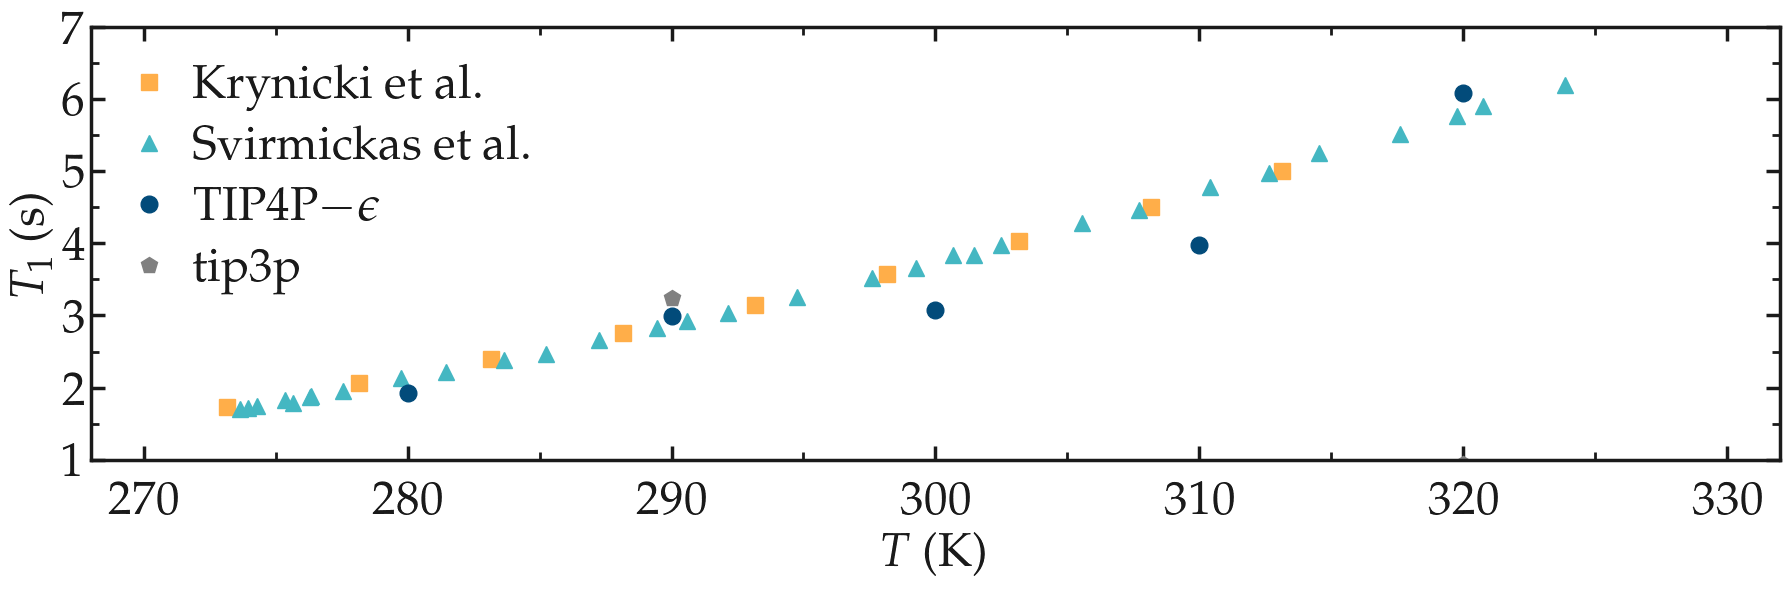

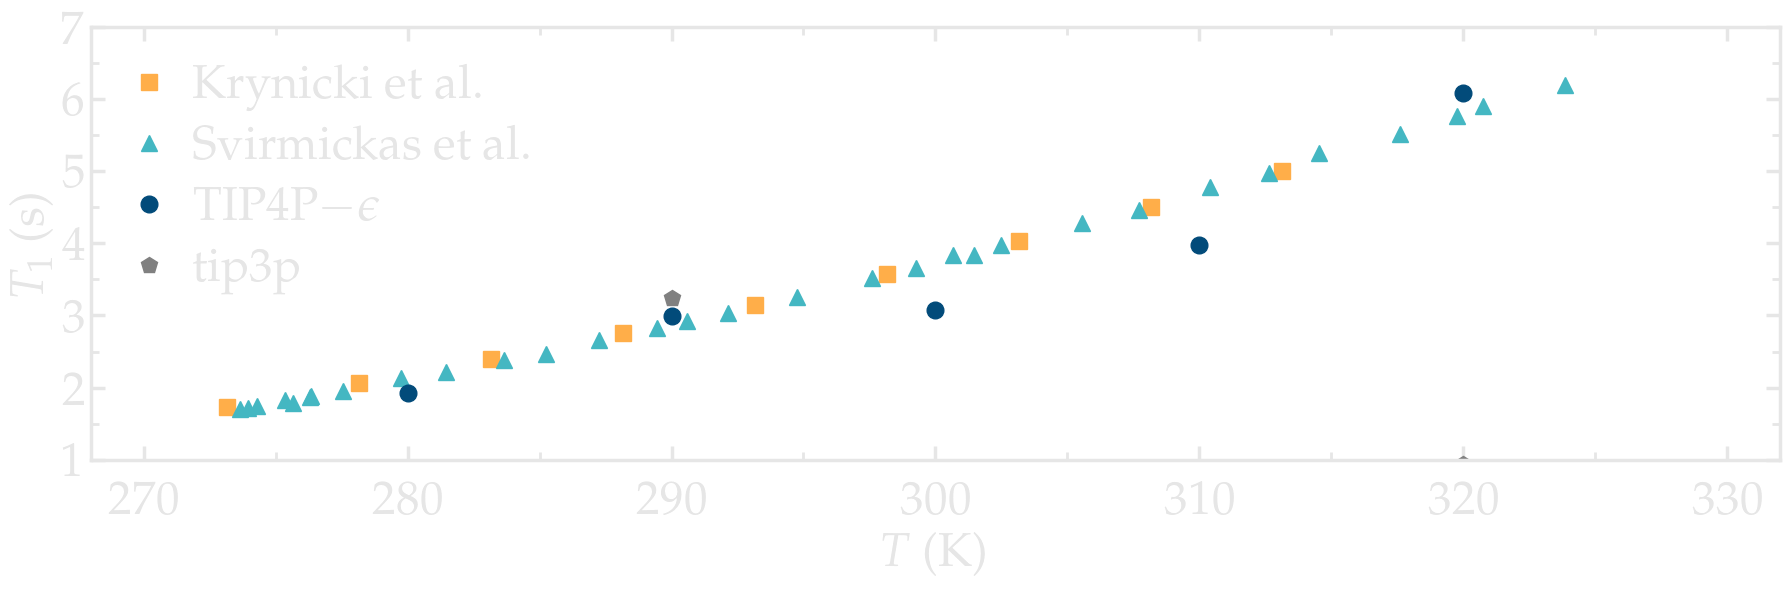

In [13]:
filename = "experimental_comparison"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = plt.figure(figsize=(18,6))
    ax, n, l_tot, c_tot = [], 0, 1, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].plot(Krynicki66.T[0]+273.15, Krynicki66.T[1], "s", color=colors["myorange"],
                markersize = 12, linewidth=4, label=r'Krynicki et al.')
    ax[-1].plot(svirmickas73.T[0]+273.15, svirmickas73.T[1], "^", color=colors["mycyan"],
                markersize = 12, linewidth=4, label=r'Svirmickas et al.')
    ax[-1].plot(all_T, 1/(R10_inter_vs_T+R10_intra_vs_T), "o", color=colors["mydarkblue"],
                markersize = 12, linewidth=4, label=r'TIP4P$-\epsilon$')
    ax[-1].plot(all_T3, 1/(R10_inter_vs_T3+R10_intra_vs_T3), "p", color=colors["mygray"],
                markersize = 12, linewidth=4, label=r'tip3p')
    complete_panel(ax[-1], r'$T$ (K)', r'$T_1$ (s)',
                   legend=True, axis_color=mygray, xpad=15)
    set_boundaries(plt, x_boundaries=(268, 332), y_boundaries=(1, 7))
    # x_ticks=np.arange(-1, 0.2, 0.2)
    # add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(fig, mode, git_path, path_figures, filename)

# Varying N data

In [16]:
all_N = []
R1_intra_vs_N = []
R2_intra_vs_N = []
gij_intra_vs_N = []
f_vs_N = []
t_vs_N = []
R1_inter_vs_N = []
R2_inter_vs_N = []
gij_inter_vs_N = []
for N in ["N25", "N39", "N62", "N99", "N158", "N251", "N398", "N631", "N1002", "N1589", "N2521", "N4000"]:
    t, f, gij, R1, R2 = read_dic("bulk-water-tip4p/raw_data/"+N+"_intra_dt1.0.npy")
    t_vs_N, f_vs_N, gij_intra_vs_N, R1_intra_vs_N, R2_intra_vs_N = append_data(t, f, gij, R1, R2, t_vs_N, f_vs_N, gij_intra_vs_N, R1_intra_vs_N, R2_intra_vs_N)
    t, f, gij, R1, R2 = read_dic("bulk-water-tip4p/raw_data/"+N+"_inter_dt1.0.npy")
    _, _, gij_inter_vs_N, R1_inter_vs_N, R2_inter_vs_N = append_data(t, f, gij, R1, R2, [], [], gij_inter_vs_N, R1_inter_vs_N, R2_inter_vs_N)
    all_N.append(np.int32(N[1:]))
all_N = np.array(all_N)
R10_inter_vs_N = extract_R0(R1_inter_vs_N)
R20_inter_vs_N = extract_R0(R2_inter_vs_N)
R10_intra_vs_N = extract_R0(R1_intra_vs_N)
R20_intra_vs_N = extract_R0(R2_intra_vs_N)

# Varying dt

In [18]:
all_dt = []
R1_intra_vs_dt = []
R2_intra_vs_dt = []
gij_intra_vs_dt = []
f_vs_dt = []
t_vs_dt = []
R1_inter_vs_dt = []
R2_inter_vs_dt = []
gij_inter_vs_dt = []
for dt in ['0.2' , '0.4', '0.8', '1.6', '3.2', '6.4']:
    t, f, gij, R1, R2 = read_dic("bulk-water-high-dumping-date/raw_data/N4000_HR_intra_dt"+dt+".npy")
    t_vs_dt, f_vs_dt, gij_intra_vs_dt, R1_intra_vs_dt, R2_intra_vs_dt = append_data(t, f, gij, R1, R2, t_vs_dt, f_vs_dt, gij_intra_vs_dt, R1_intra_vs_dt, R2_intra_vs_dt)
    t, f, gij, R1, R2 = read_dic("bulk-water-high-dumping-date/raw_data/N4000_HR_inter_dt"+dt+".npy")
    _, _, gij_inter_vs_dt, R1_inter_vs_dt, R2_inter_vs_dt = append_data(t, f, gij, R1, R2, [], [], gij_inter_vs_dt, R1_inter_vs_dt, R2_inter_vs_dt)
    all_dt.append(np.float32(dt))
for dt in ['1.0' , '2.0', '4.0', '8.0', '16.0', '32.0']:
    t, f, gij, R1, R2 = read_dic("bulk-water-tip4p/raw_data/N4000_intra_dt"+dt+".npy")
    t_vs_dt, f_vs_dt, gij_intra_vs_dt, R1_intra_vs_dt, R2_intra_vs_dt = append_data(t, f, gij, R1, R2, t_vs_dt, f_vs_dt, gij_intra_vs_dt, R1_intra_vs_dt, R2_intra_vs_dt)
    t, f, gij, R1, R2 = read_dic("bulk-water-tip4p/raw_data/N4000_inter_dt"+dt+".npy")
    _, _, gij_inter_vs_dt, R1_inter_vs_dt, R2_inter_vs_dt = append_data(t, f, gij, R1, R2, [], [], gij_inter_vs_dt, R1_inter_vs_dt, R2_inter_vs_dt)
    all_dt.append(np.float32(dt))
all_dt = np.array(all_dt)
R10_inter_vs_dt = extract_R0(R1_inter_vs_dt)
R20_inter_vs_dt = extract_R0(R2_inter_vs_dt)
R10_intra_vs_dt = extract_R0(R1_intra_vs_dt)
R20_intra_vs_dt = extract_R0(R2_intra_vs_dt)

# Aniso data

In [19]:
t_aniso, f_aniso, gij1_intra_aniso, gij2_intra_aniso, gij3_intra_aniso, R1_intra_aniso, R2_intra_aniso = read_dic("bulk-water-tip4p/raw_data/N4000_intra_aniso_dt1.0.npy", aniso=True)
_, _, gij1_inter_aniso, gij2_inter_aniso, gij3_inter_aniso, R1_inter_aniso, R2_inter_aniso = read_dic("bulk-water-tip4p/raw_data/N4000_inter_aniso_dt1.0.npy", aniso=True)

In [21]:
1/(R10_inter_vs_T_b+R10_intra_vs_T_b)

array([3.828371], dtype=float32)

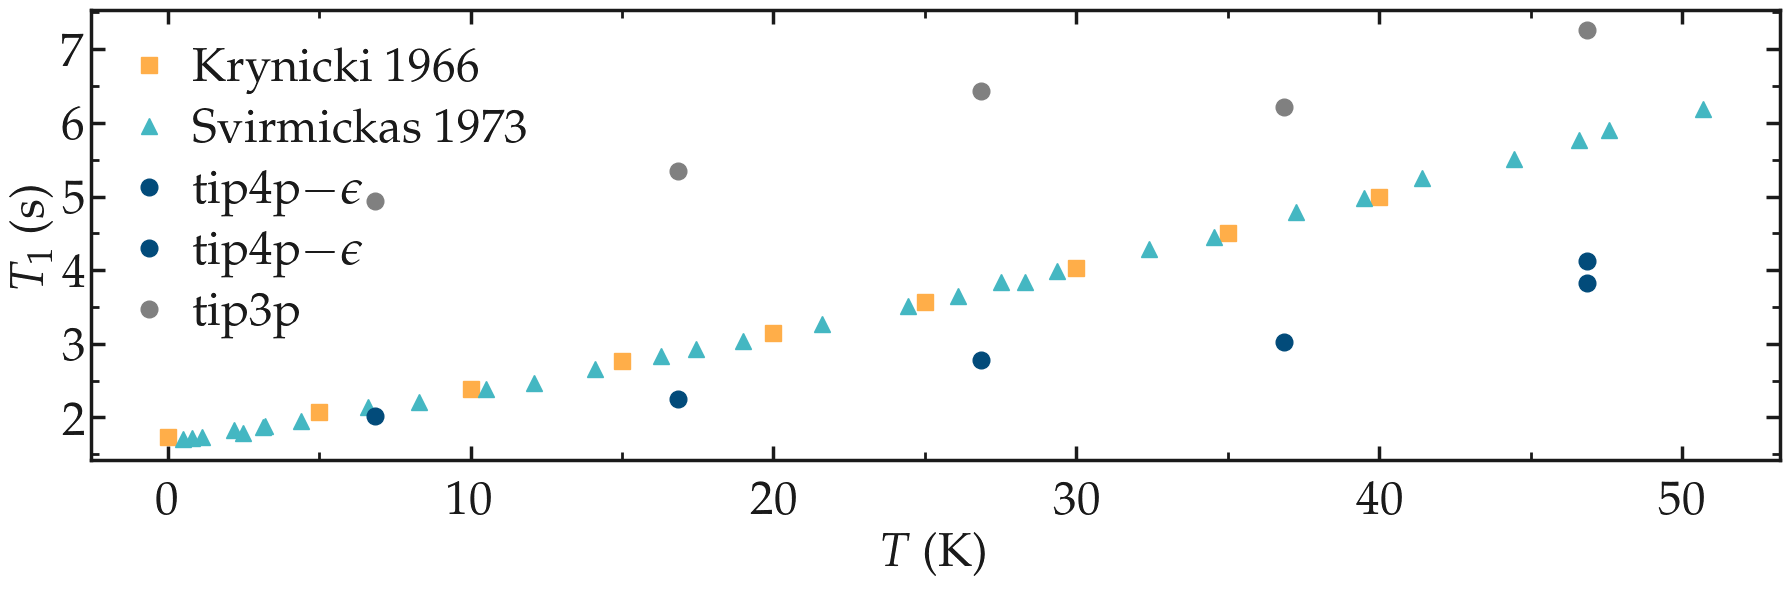

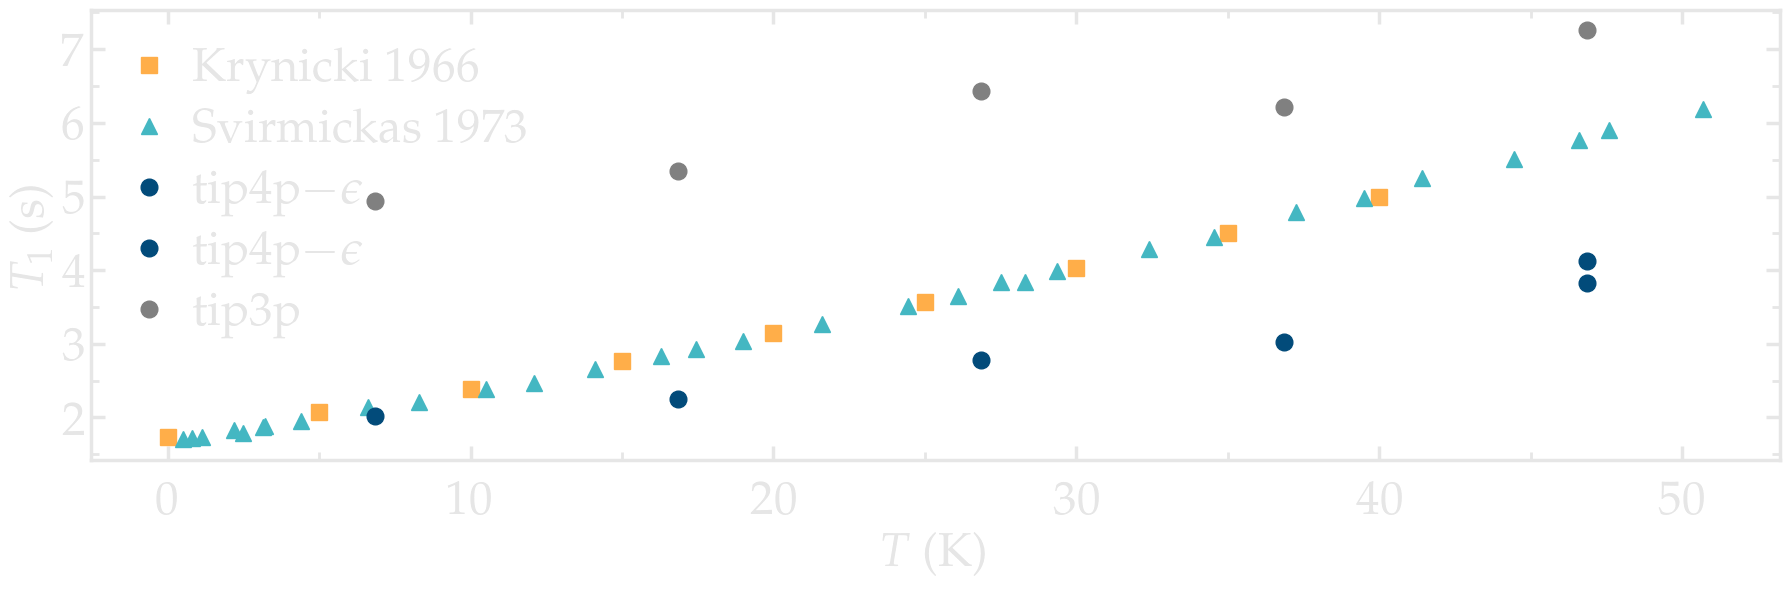

In [15]:
R10_inter_vs_T+R10_intra_vs_T

array([0.49550074, 0.4459409 , 0.36041194, 0.33294383, 0.24179041],
      dtype=float32)

/home/simon/Git/NMR/nmrformd/examples/pyplot-perso/functions.py:119: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.tight_layout()
/home/simon/Git/NMR/nmrformd/examples/pyplot-perso/functions.py:121: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(git_root + path_figures + filename + "-light.png",
/home/simon/Git/NMR/nmrformd/examples/pyplot-perso/functions.py:125: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig(git_root + path_figures + filename + "-dark.png",
/home/simon/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.print_figure(bytes_io, **kw)


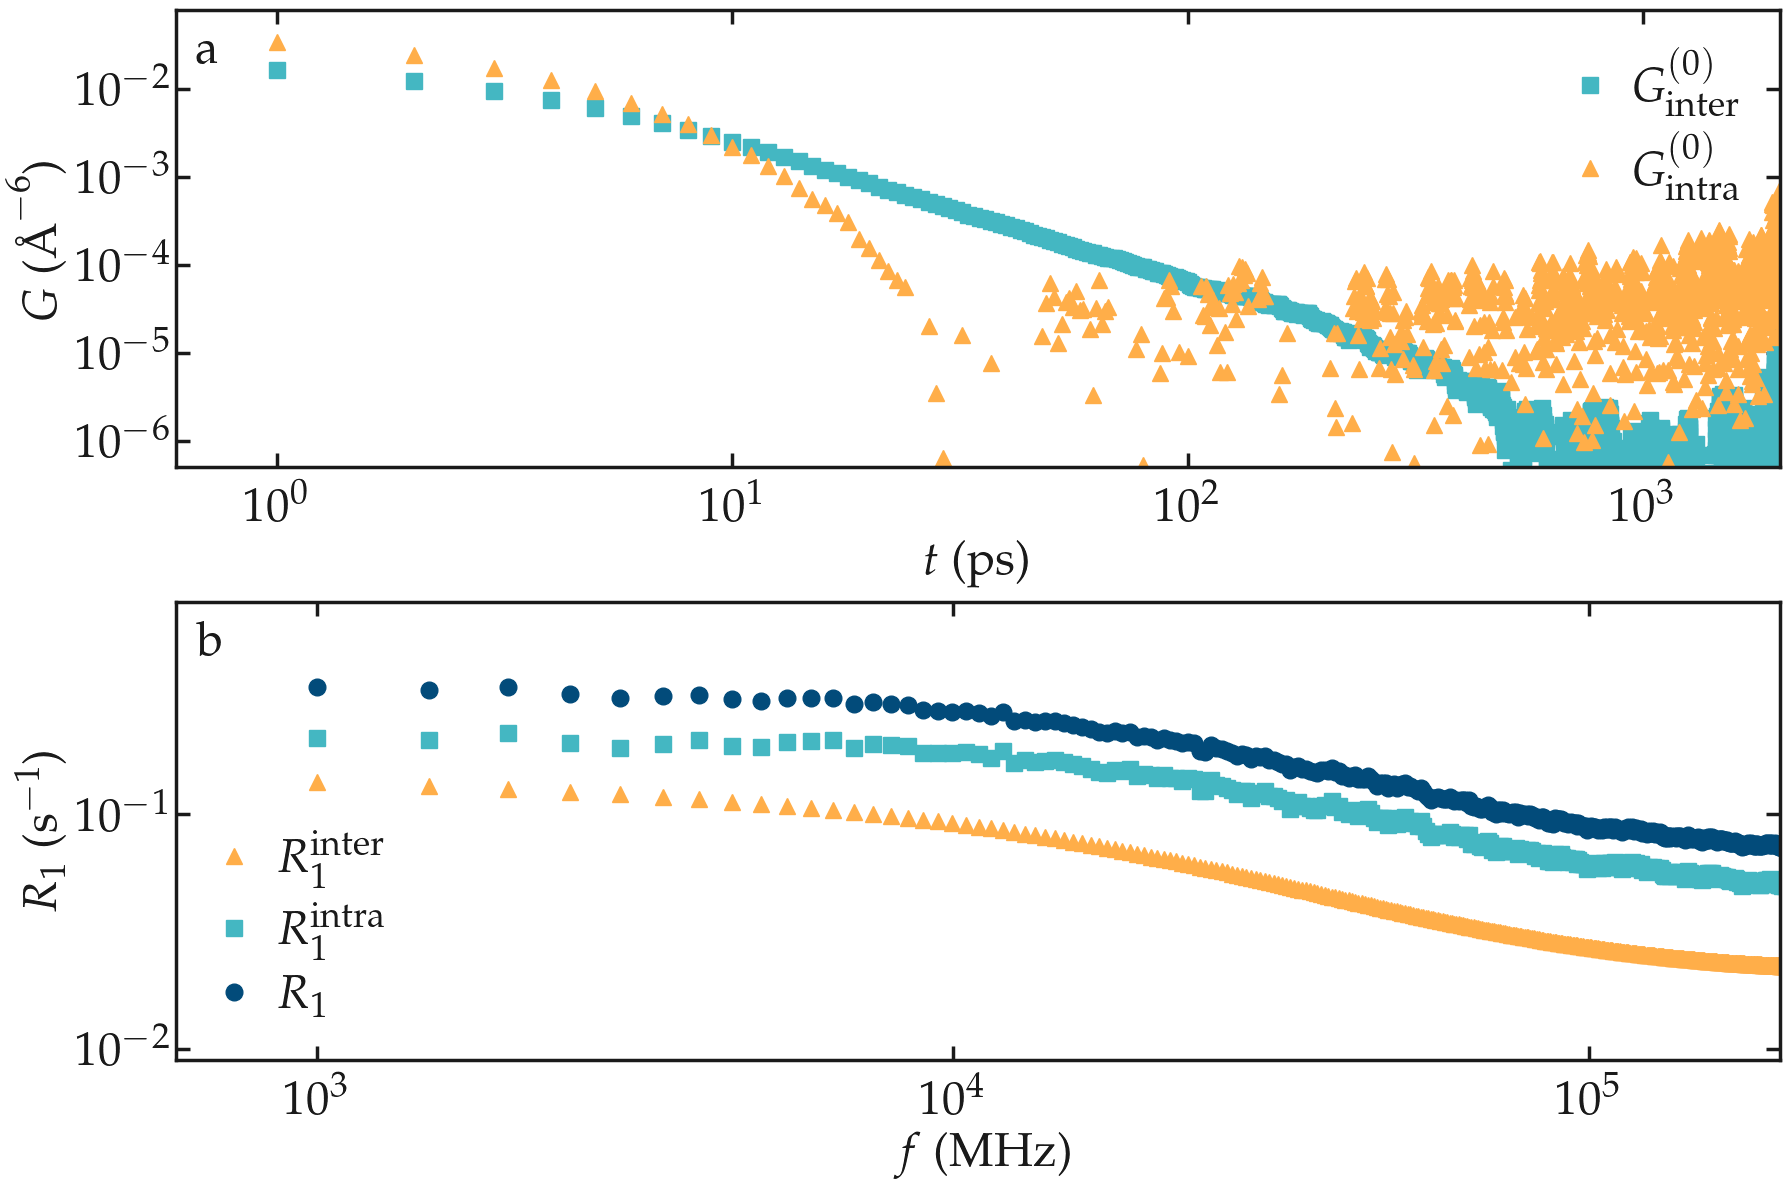

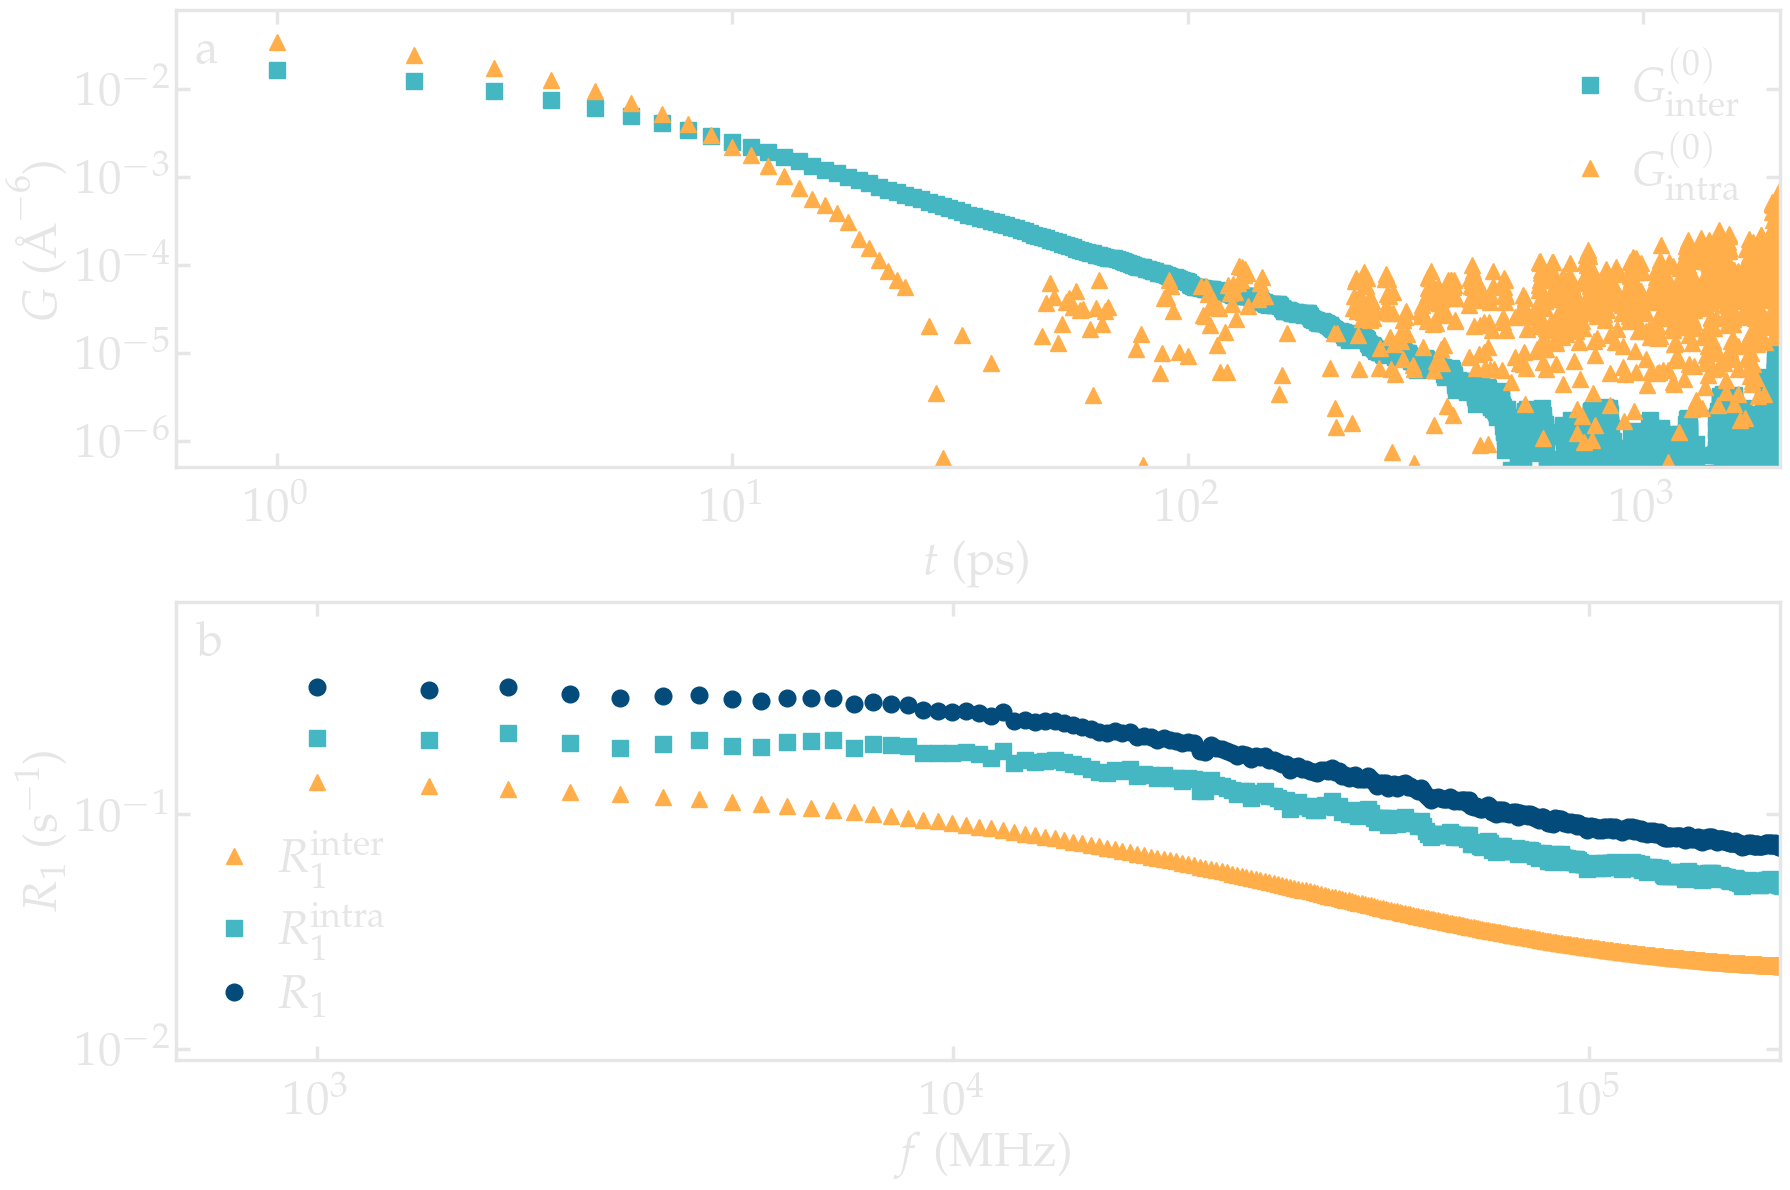

In [16]:
filename = "water_spectrum"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = plt.figure(figsize=(18,12))
    ax, n, l_tot, c_tot = [], 0, 2, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].loglog(t_vs_N[-1], gij_inter_vs_N[-1], "s", color=colors["mycyan"],
                    markersize = 12, linewidth=4, label=r'$G_\mathrm{inter}^{(0)}$')
    ax[-1].loglog(t_vs_N[-1], gij_intra_vs_N[-1], "^", color=colors["myorange"],
                    markersize = 12, linewidth=4, label=r'$G_\mathrm{intra}^{(0)}$')
    complete_panel(ax[-1], r'$t$ (ps)', r'$G$ ($\textrm{\AA}^{-6}$)',
                   legend=True, axis_color=mygray, xpad=15)
    set_boundaries(plt, x_boundaries=(0.6, 2000), y_boundaries=(5e-7, 0.08))
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].loglog(f_vs_N[-1], R1_inter_vs_N[-1], "^", color=colors["myorange"],
                    markersize = 12, linewidth=4, label=r'$R_1^\mathrm{inter}$')
    ax[-1].loglog(f_vs_N[-1], R1_intra_vs_N[-1], "s", color=colors["mycyan"],
                    markersize = 12, linewidth=4, label=r'$R_1^\mathrm{intra}$')
    ax[-1].loglog(f_vs_N[-1], R1_inter_vs_N[-1]+R1_intra_vs_N[-1], "o", color=colors["mydarkblue"],
                    markersize = 12, linewidth=4, label=r'$R_1$')
    complete_panel(ax[-1], r'$f$ (MHz)', r'$R_1$ (s$^{-1}$)',
                   legend=True, axis_color=mygray, xpad=15)
    set_boundaries(plt, x_boundaries=(6e2, 2e5), y_boundaries=(0.009, 0.8))
    # x_ticks=np.arange(-1, 0.2, 0.2)
    add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(fig, mode, git_path, path_figures, filename)

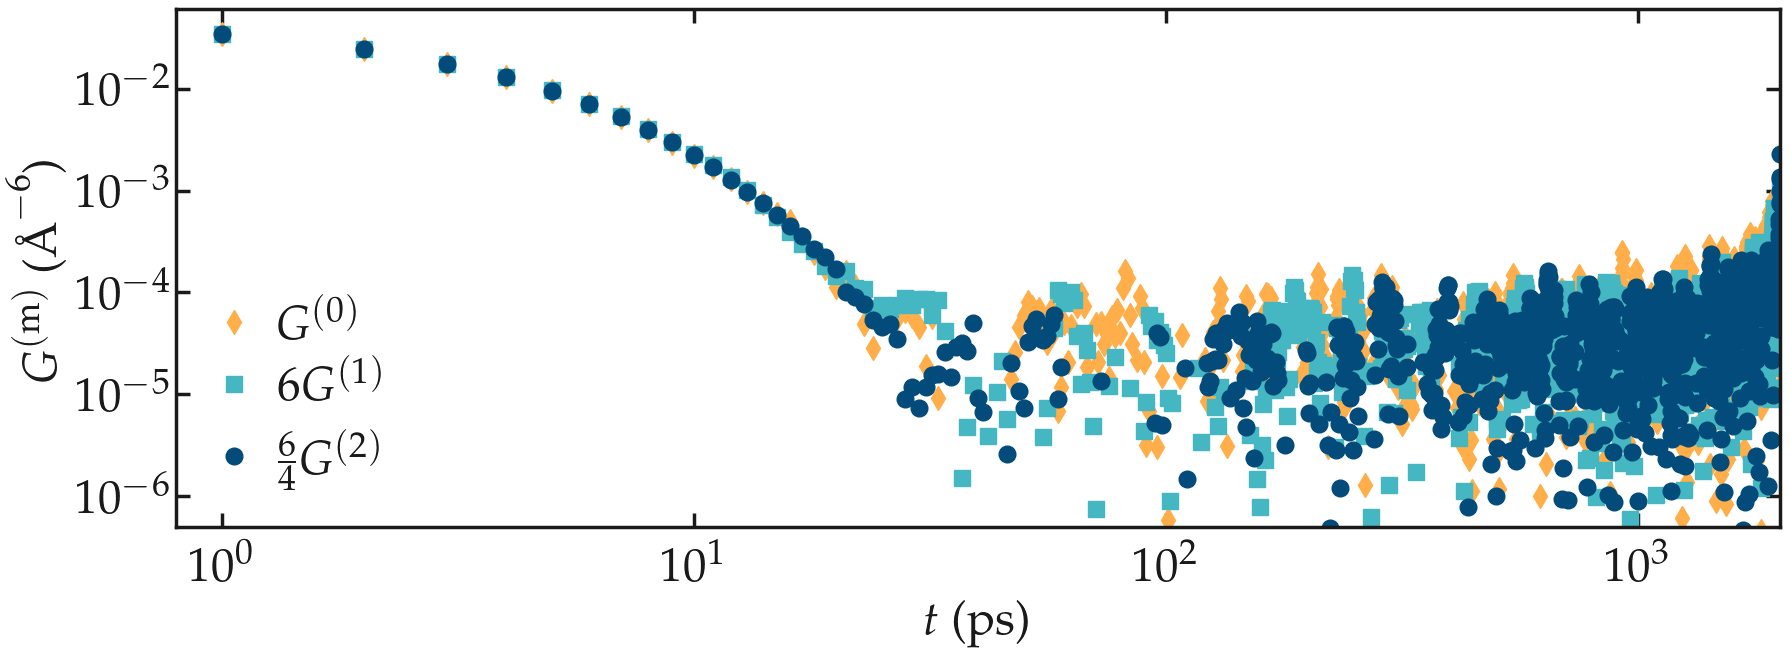

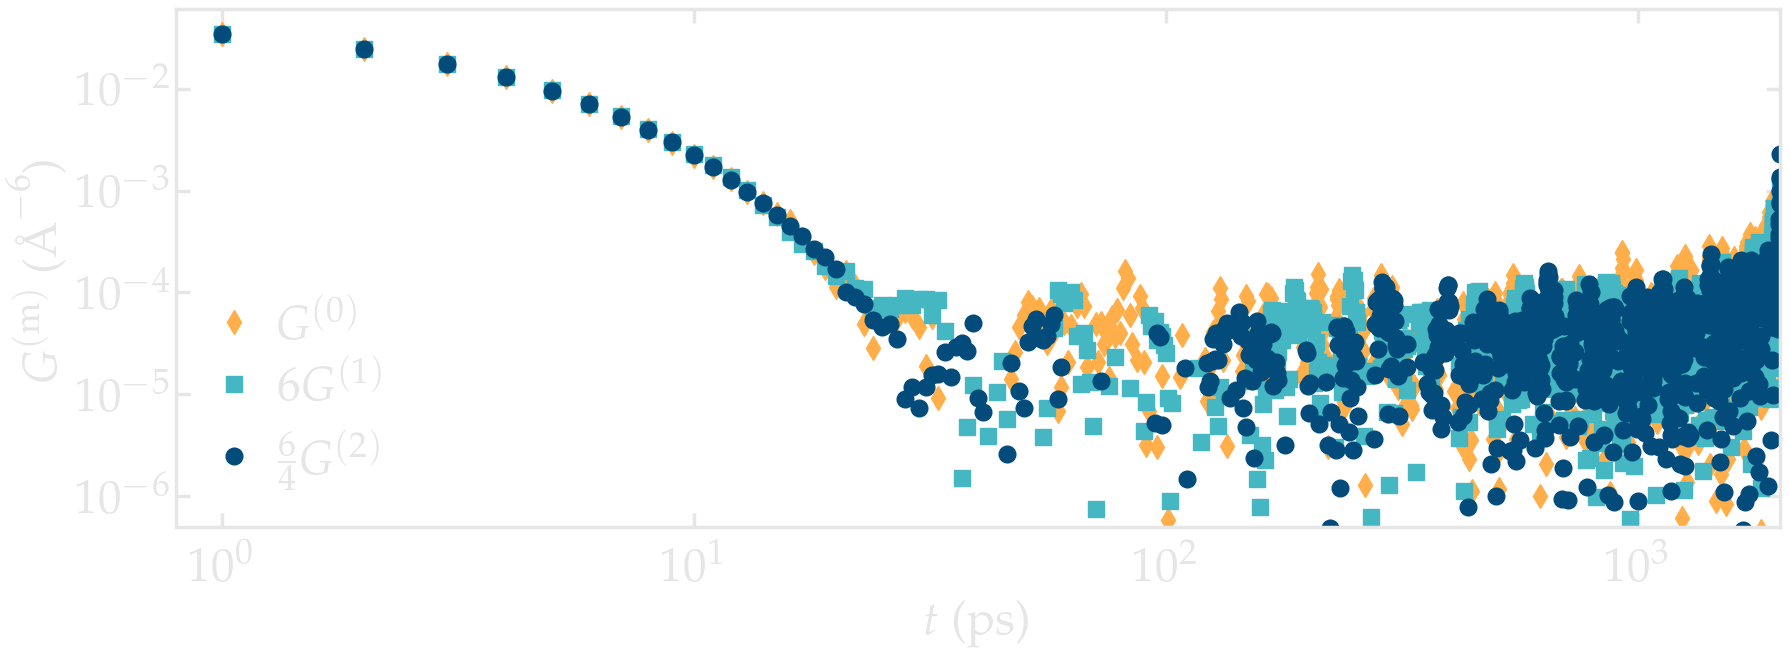

In [17]:
filename = "effect_of_anisotropy"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = plt.figure(figsize=(18,12))
    ax, n, l_tot, c_tot = [], 0, 2, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].loglog(t_aniso, gij1_intra_aniso, "d", color=colors["myorange"],
                    markersize = 12, linewidth=4, label=r'$G^{(0)}$')
    ax[-1].loglog(t_aniso, gij2_intra_aniso*6, "s", color=colors["mycyan"],
                    markersize = 12, linewidth=4, label=r'$6 G^{(1)}$')
    ax[-1].loglog(t_aniso, gij3_intra_aniso*6/4, "o", color=colors["mydarkblue"],
                    markersize = 12, linewidth=4, label=r'$\frac{6}{4} G^{(2)}$')
    complete_panel(ax[-1], r'$t$ (ps)', r'$G^{(\mathrm{m})}$ ($\textrm{\AA}^{-6}$)',
                   legend=True, axis_color=mygray, xpad=15)
    set_boundaries(plt, x_boundaries=(0.8, 2000), y_boundaries=(5e-7, 0.06))
    # add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(fig, mode, git_path, path_figures, filename)

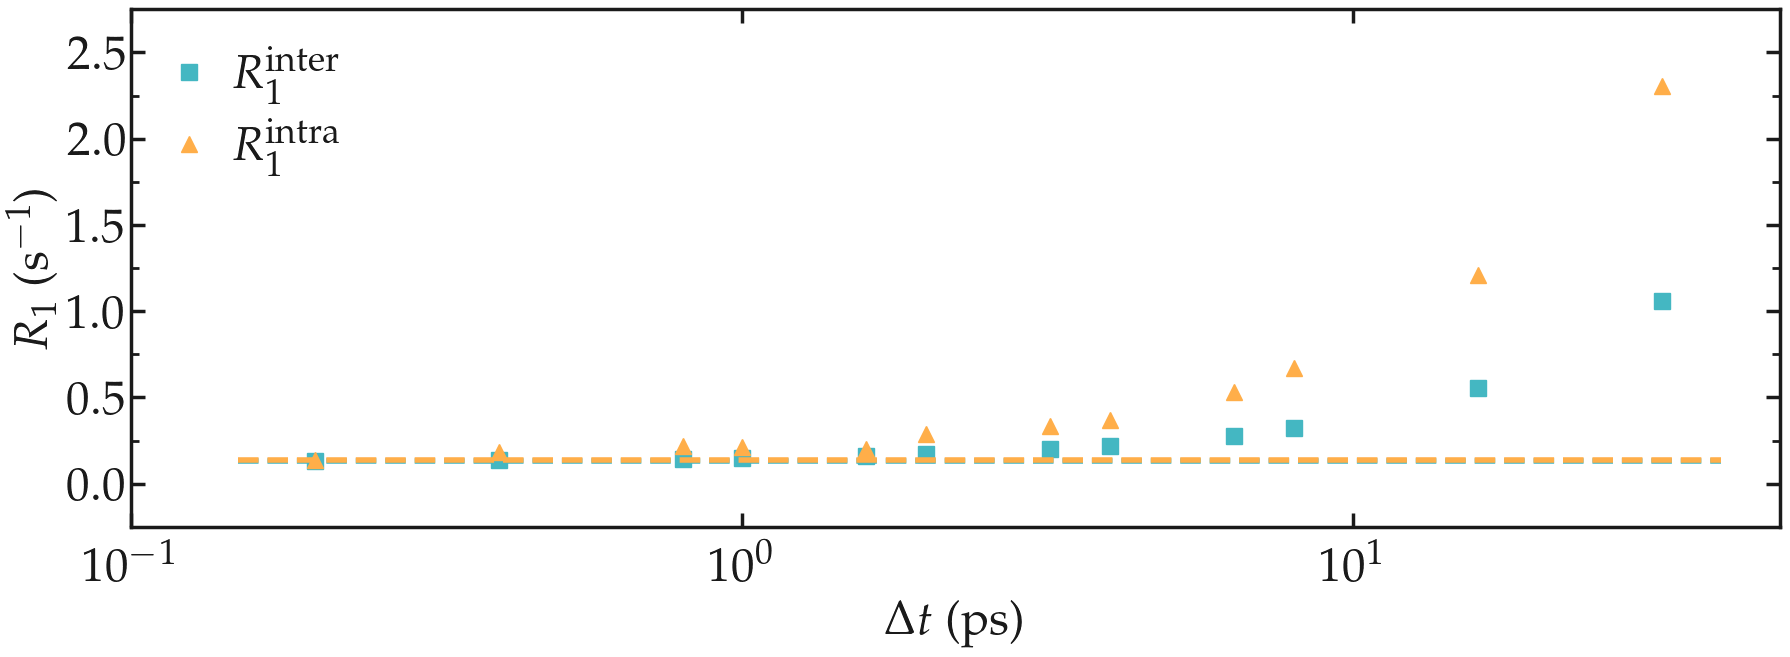

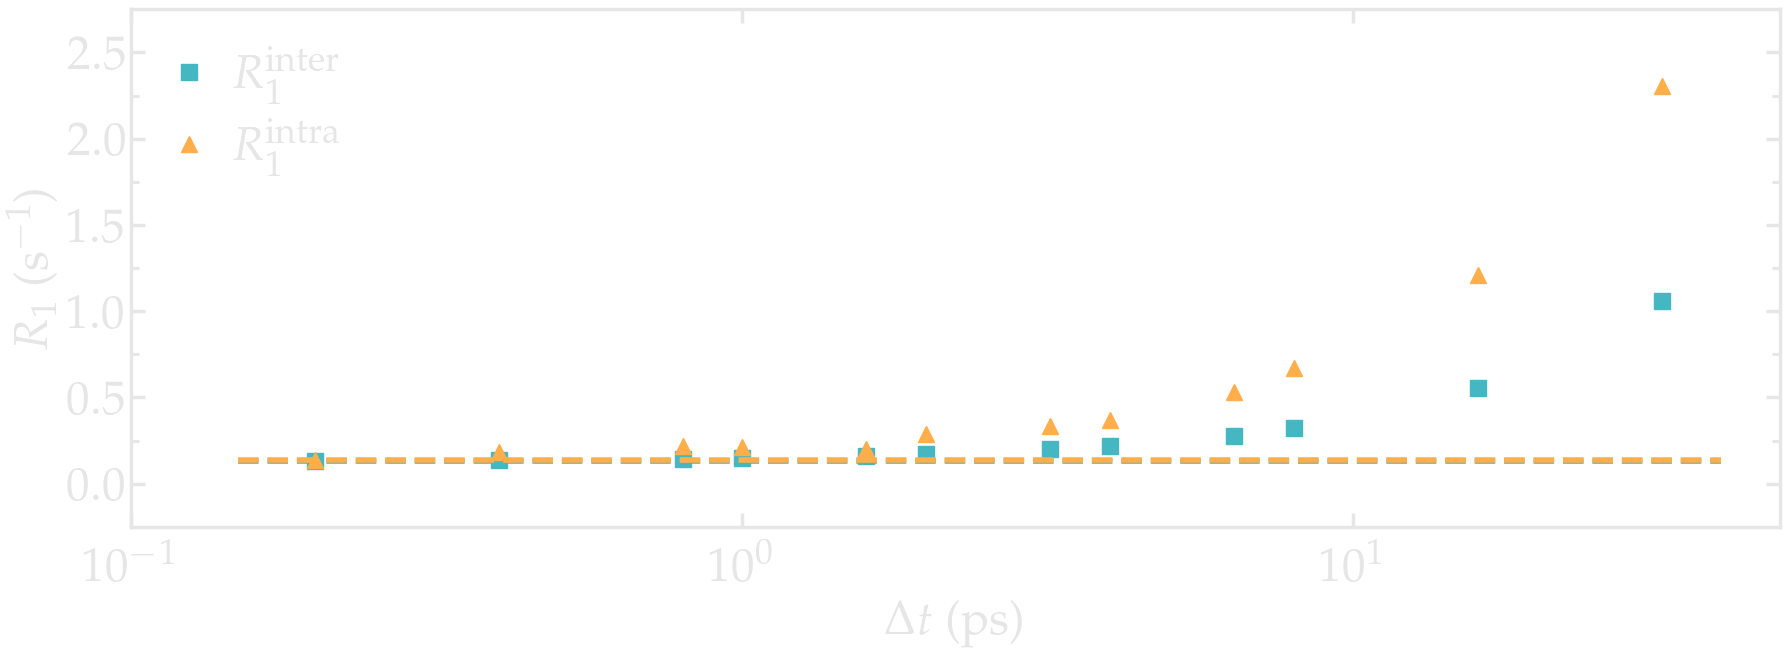

In [18]:
filename = "effect_dt_on_R1"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = plt.figure(figsize=(18,12))
    ax, n, l_tot, c_tot = [], 0, 2, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    x = np.linspace(0.15, 40)
    ax[-1].semilogx(all_dt, R10_inter_vs_dt, "s", color=colors["mycyan"],
                    markersize = 12, linewidth=4, label=r'$R_1^\mathrm{inter}$')
    ax[-1].semilogx(x, x*0 + R10_inter_vs_dt[0],
                    "--", color=colors["mycyan"],
                    markersize = 12, linewidth=4)
    ax[-1].semilogx(all_dt, R10_intra_vs_dt, "^", color=colors["myorange"],
                    markersize = 12, linewidth=4, label=r'$R_1^\mathrm{intra}$')
    ax[-1].semilogx(x, x*0 + R10_intra_vs_dt[0],
                    "--", color=colors["myorange"],
                    markersize = 12, linewidth=4)
    complete_panel(ax[-1], r'$\Delta t$ (ps)', r'$R_1$ (s$^{-1}$)',
                   legend=True, axis_color=mygray, xpad=15)
    set_boundaries(plt, x_boundaries=(0.1, 50), y_boundaries=(-0.25, 2.75))
    # x_ticks=np.arange(-1, 0.2, 0.2)
    # add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(fig, mode, git_path, path_figures, filename)

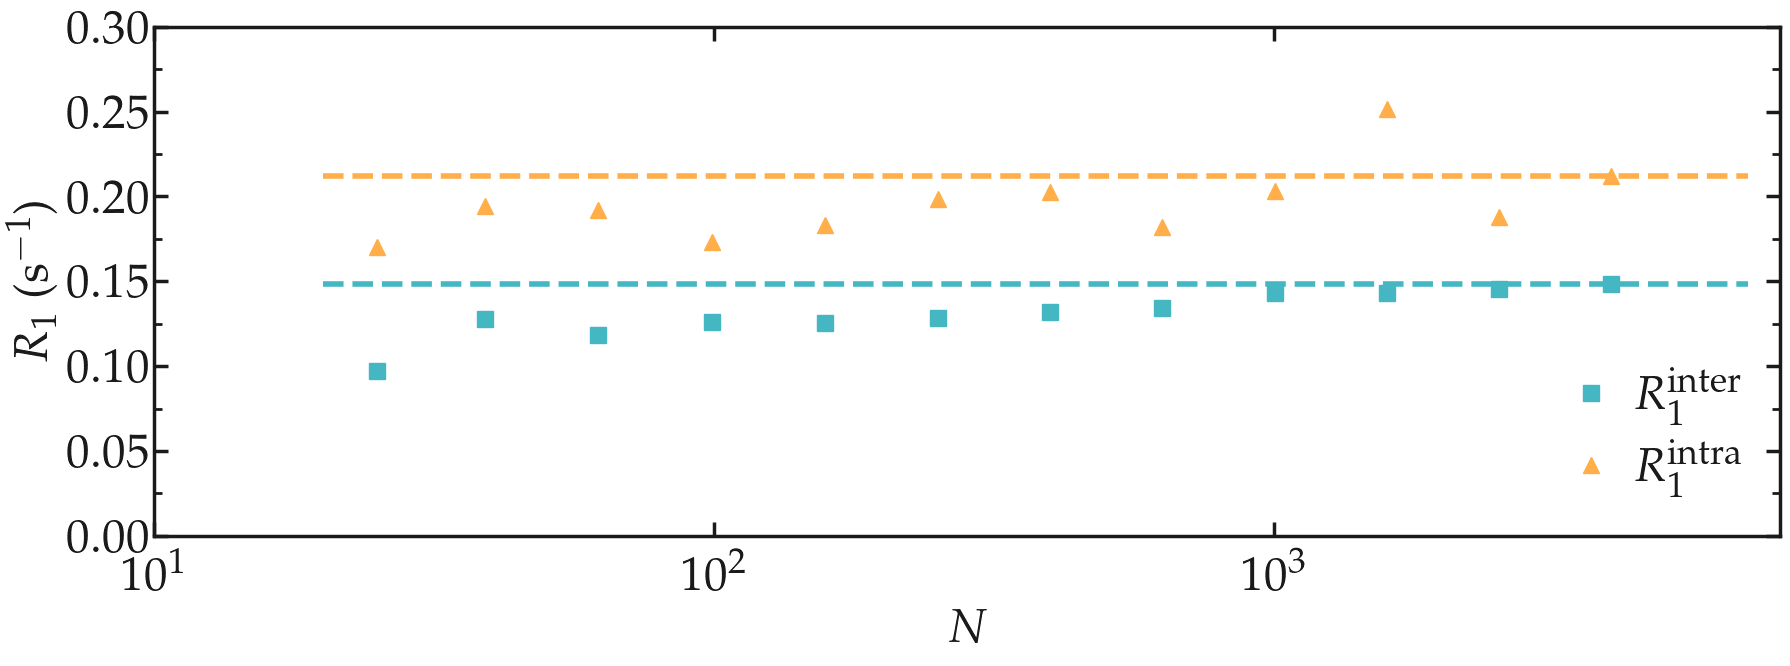

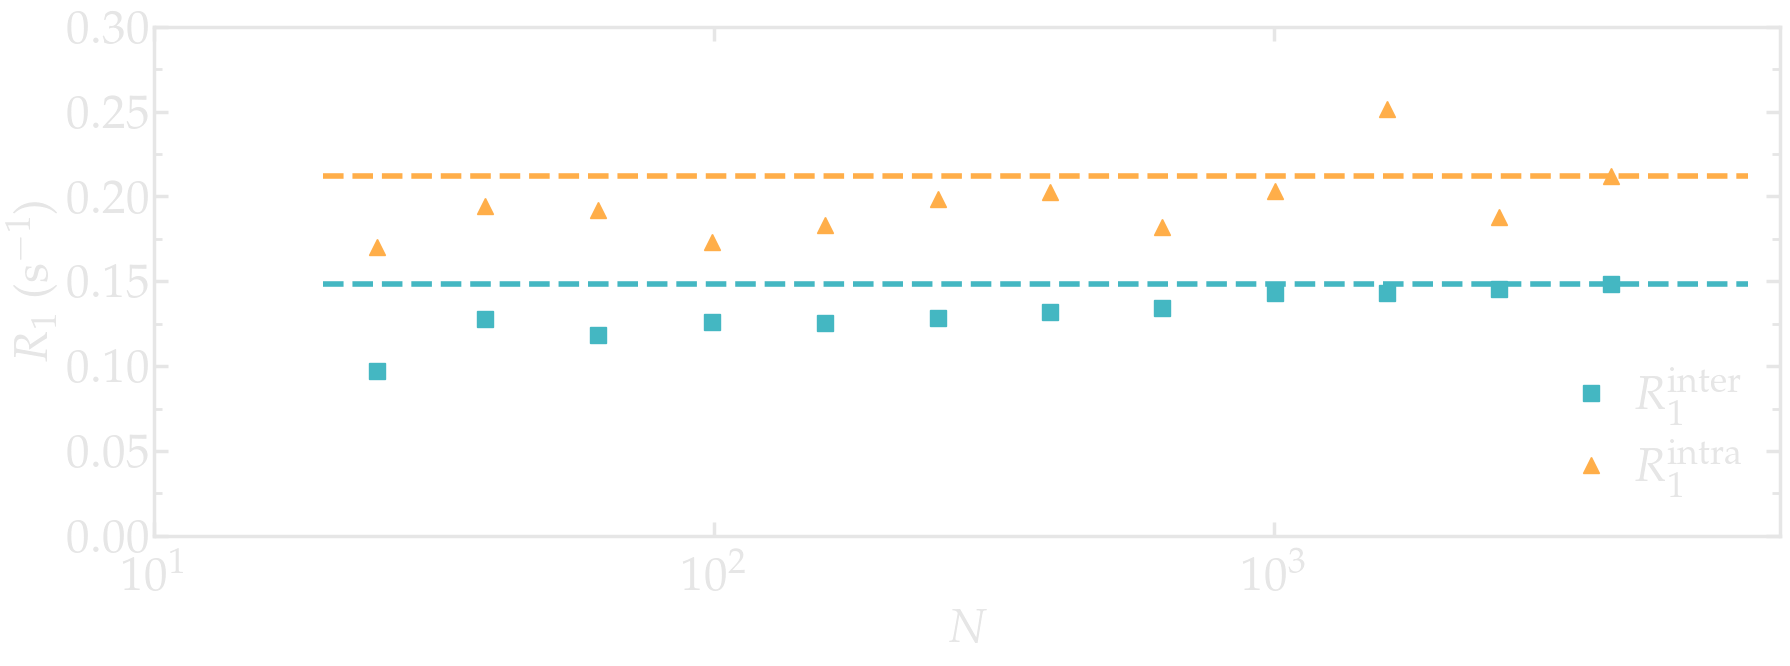

In [19]:
filename = "effect_L_on_R1"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = plt.figure(figsize=(18,12))
    ax, n, l_tot, c_tot = [], 0, 2, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    x = np.linspace(20, 7000)
    ax[-1].semilogx(all_N, R10_inter_vs_N, "s", color=colors["mycyan"],
                    markersize = 12, linewidth=4, label=r'$R_1^\mathrm{inter}$')
    ax[-1].semilogx(x, x*0 + R10_inter_vs_N[-1],
                    "--", color=colors["mycyan"],
                    markersize = 12, linewidth=4)
    ax[-1].semilogx(all_N, R10_intra_vs_N, "^", color=colors["myorange"],
                    markersize = 12, linewidth=4, label=r'$R_1^\mathrm{intra}$')
    ax[-1].semilogx(x, x*0 + R10_intra_vs_N[-1],
                    "--", color=colors["myorange"],
                    markersize = 12, linewidth=4)
    complete_panel(ax[-1], r'$N$', r'$R_1$ (s$^{-1}$)',
                   legend=True, axis_color=mygray, xpad=15)
    set_boundaries(plt, x_boundaries=(10, 8000), y_boundaries=(0, 0.3))
    # x_ticks=np.arange(-1, 0.2, 0.2)
    # add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(fig, mode, git_path, path_figures, filename)

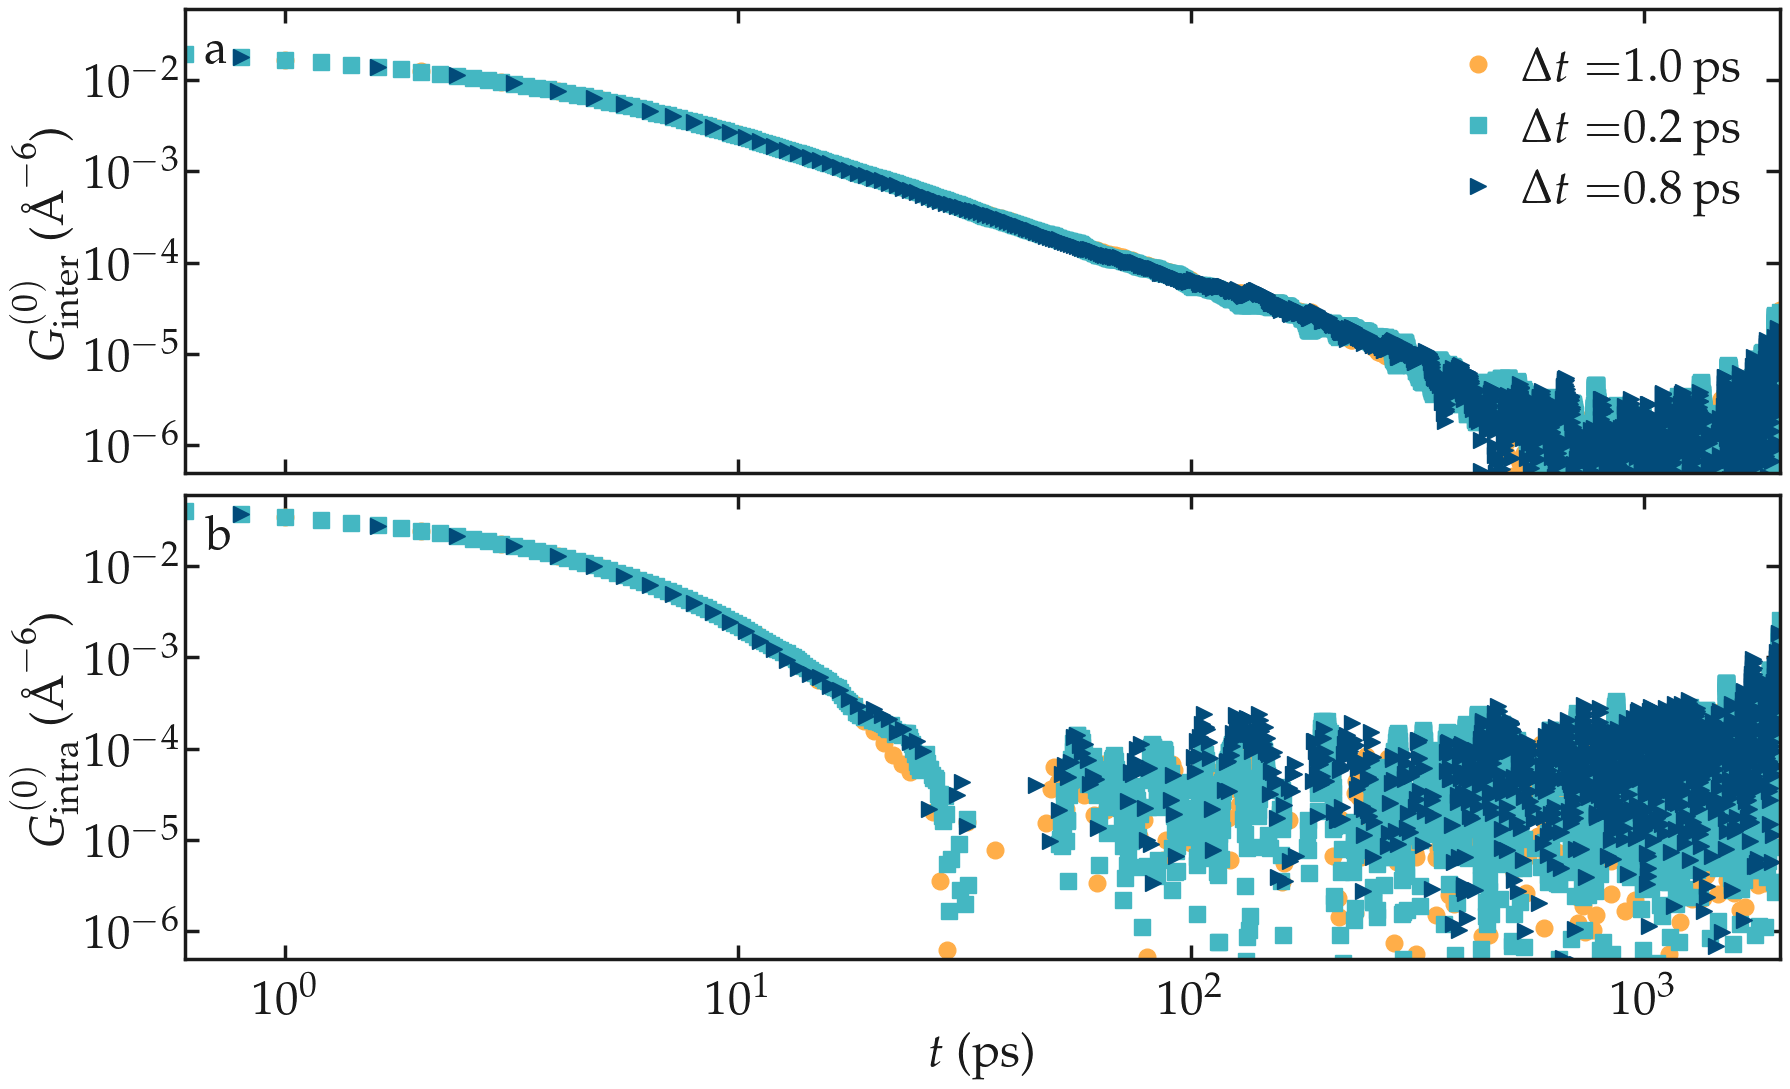

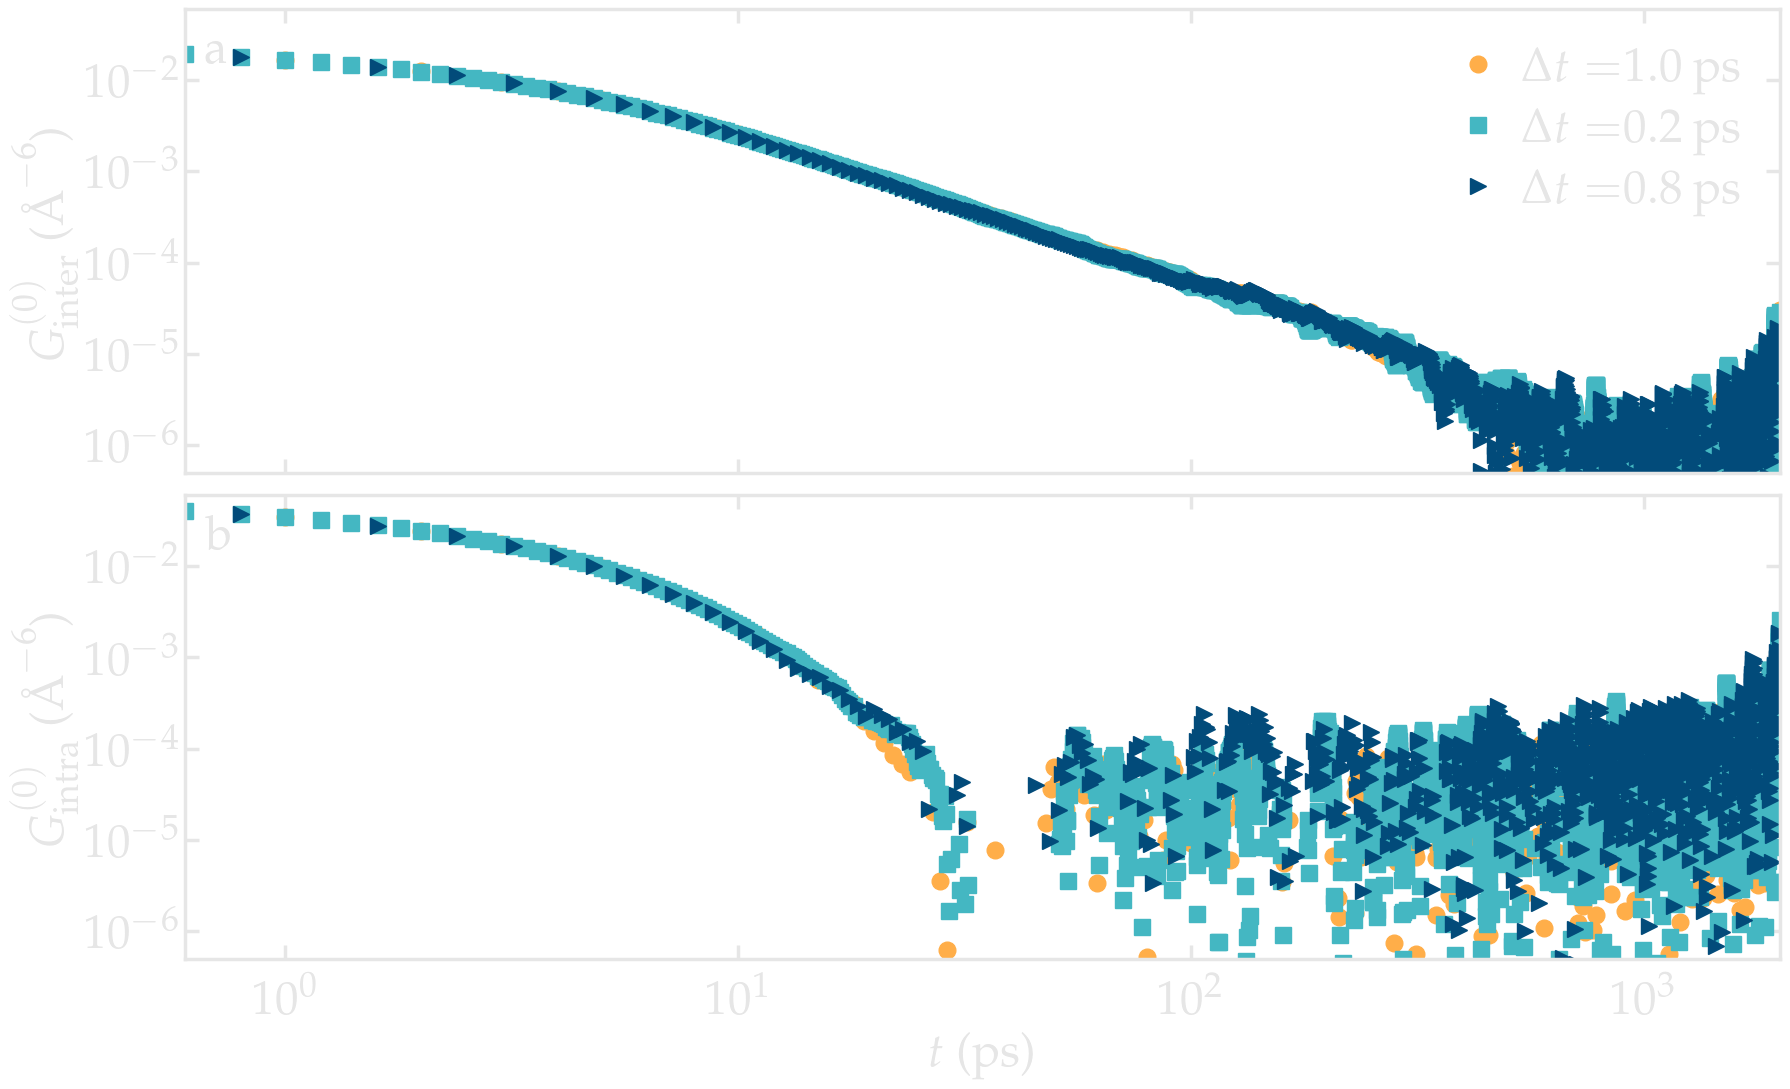

In [20]:
filename = "effect_dt_on_G"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = plt.figure(figsize=(18,11))
    ax, n, l_tot, c_tot = [], 0, 2, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    x = np.linspace(0.15, 40)
    id = 6
    ax[-1].loglog(t_vs_dt[id], gij_inter_vs_dt[id], "o", color=colors["myorange"],
                    markersize = 12, linewidth=4, label=r'$\Delta t = $' + str(all_dt[id]) + ' ps')
    id = 0
    ax[-1].loglog(t_vs_dt[id], gij_inter_vs_dt[id], "s", color=colors["mycyan"],
                    markersize = 12, linewidth=4, label=r'$\Delta t = $' + str(all_dt[id]) + ' ps')
    id = 2
    ax[-1].loglog(t_vs_dt[id], gij_inter_vs_dt[id], ">", color=colors["mydarkblue"],
                    markersize = 12, linewidth=4, label=r'$\Delta t = $' + str(all_dt[id]) + ' ps')
    complete_panel(ax[-1], None, r'$G_\mathrm{inter}^{(0)}$ ($\textrm{\AA}^{-6}$)',
                   legend=True, axis_color=mygray, xpad=15)
    set_boundaries(plt, x_boundaries=(0.6, 2e3), y_boundaries=(5e-7, 0.06))
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    x = np.linspace(0.15, 40)
    id = 6
    ax[-1].loglog(t_vs_dt[id], gij_intra_vs_dt[id], "o", color=colors["myorange"],
                    markersize = 12, linewidth=4, label=r'$\Delta t = $' + str(all_dt[id]) + ' ps')
    id = 0
    ax[-1].loglog(t_vs_dt[id], gij_intra_vs_dt[id], "s", color=colors["mycyan"],
                    markersize = 12, linewidth=4, label=r'$\Delta t = $' + str(all_dt[id]) + ' ps')
    id = 2
    ax[-1].loglog(t_vs_dt[id], gij_intra_vs_dt[id], ">", color=colors["mydarkblue"],
                    markersize = 12, linewidth=4, label=r'$\Delta t = $' + str(all_dt[id]) + ' ps')
    complete_panel(ax[-1], r'$t$ (ps)', r'$G_\mathrm{intra}^{(0)}$ ($\textrm{\AA}^{-6}$)',
                   legend=False, axis_color=mygray, xpad=15)
    set_boundaries(plt, x_boundaries=(0.6, 2e3), y_boundaries=(5e-7, 0.06))
    # x_ticks=np.arange(-1, 0.2, 0.2)
    add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(fig, mode, git_path, path_figures, filename)

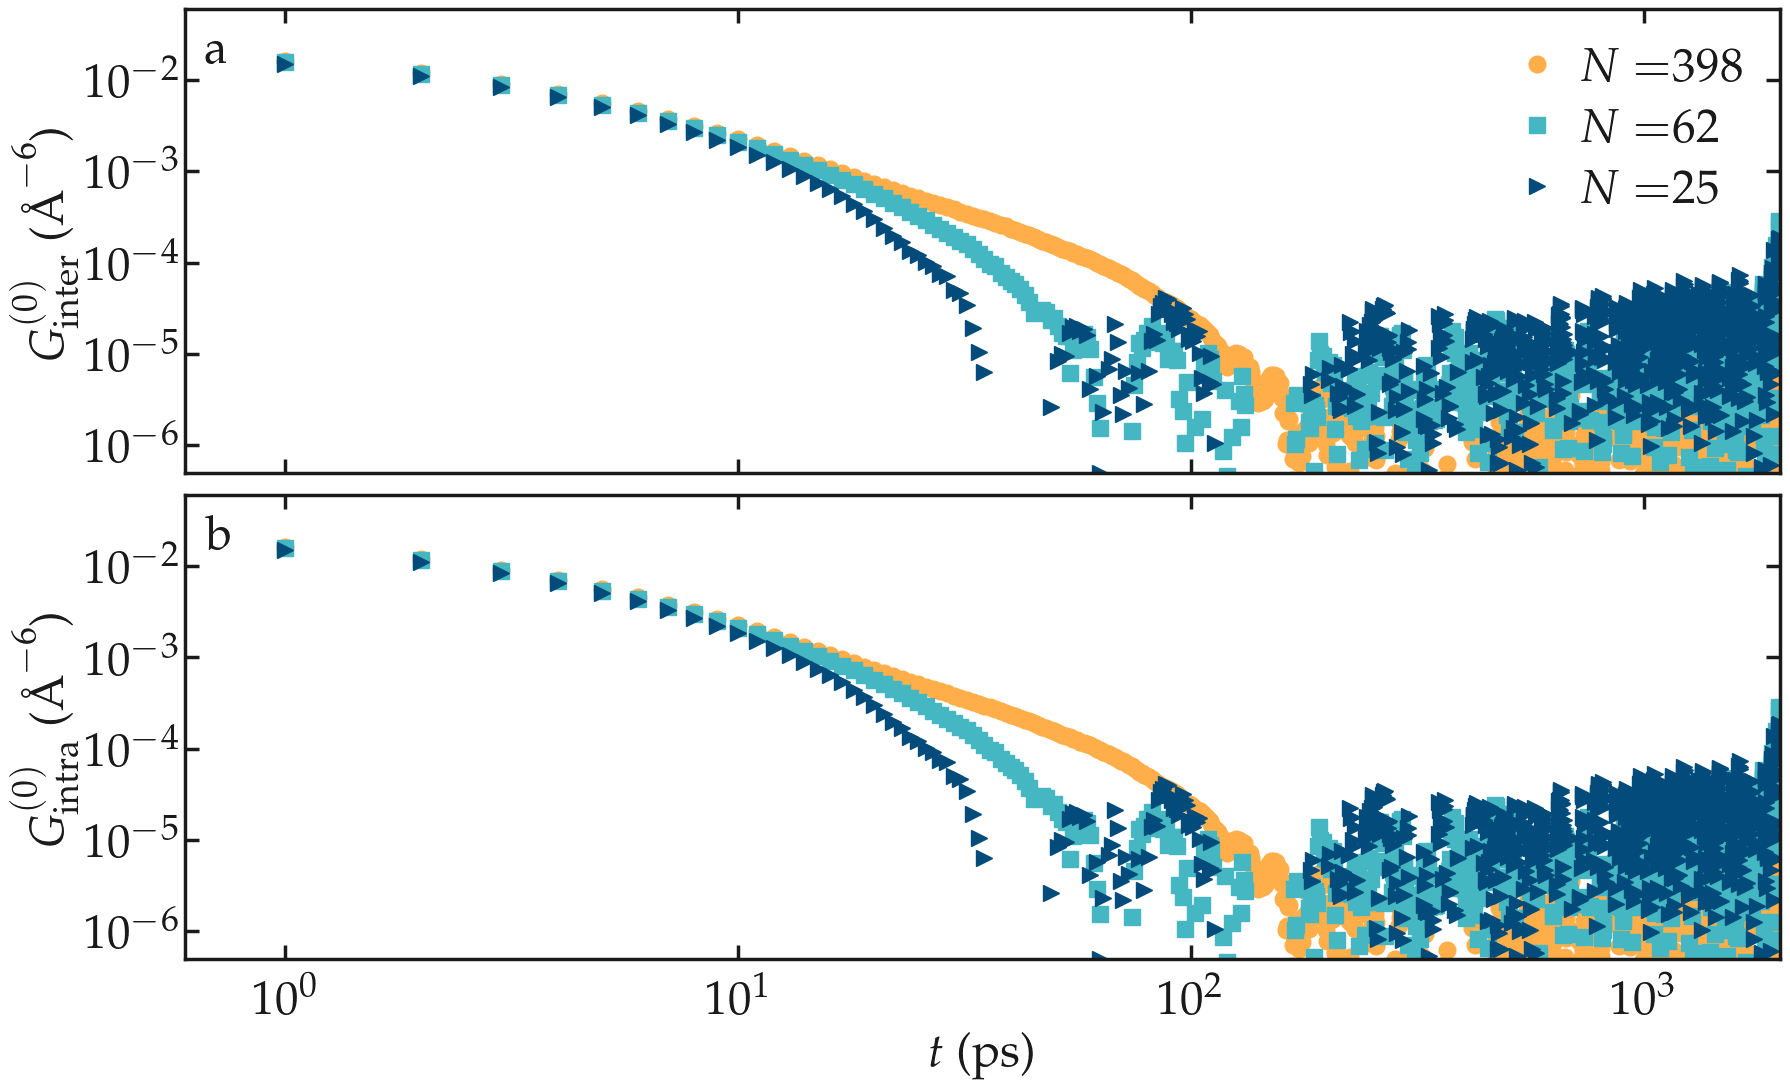

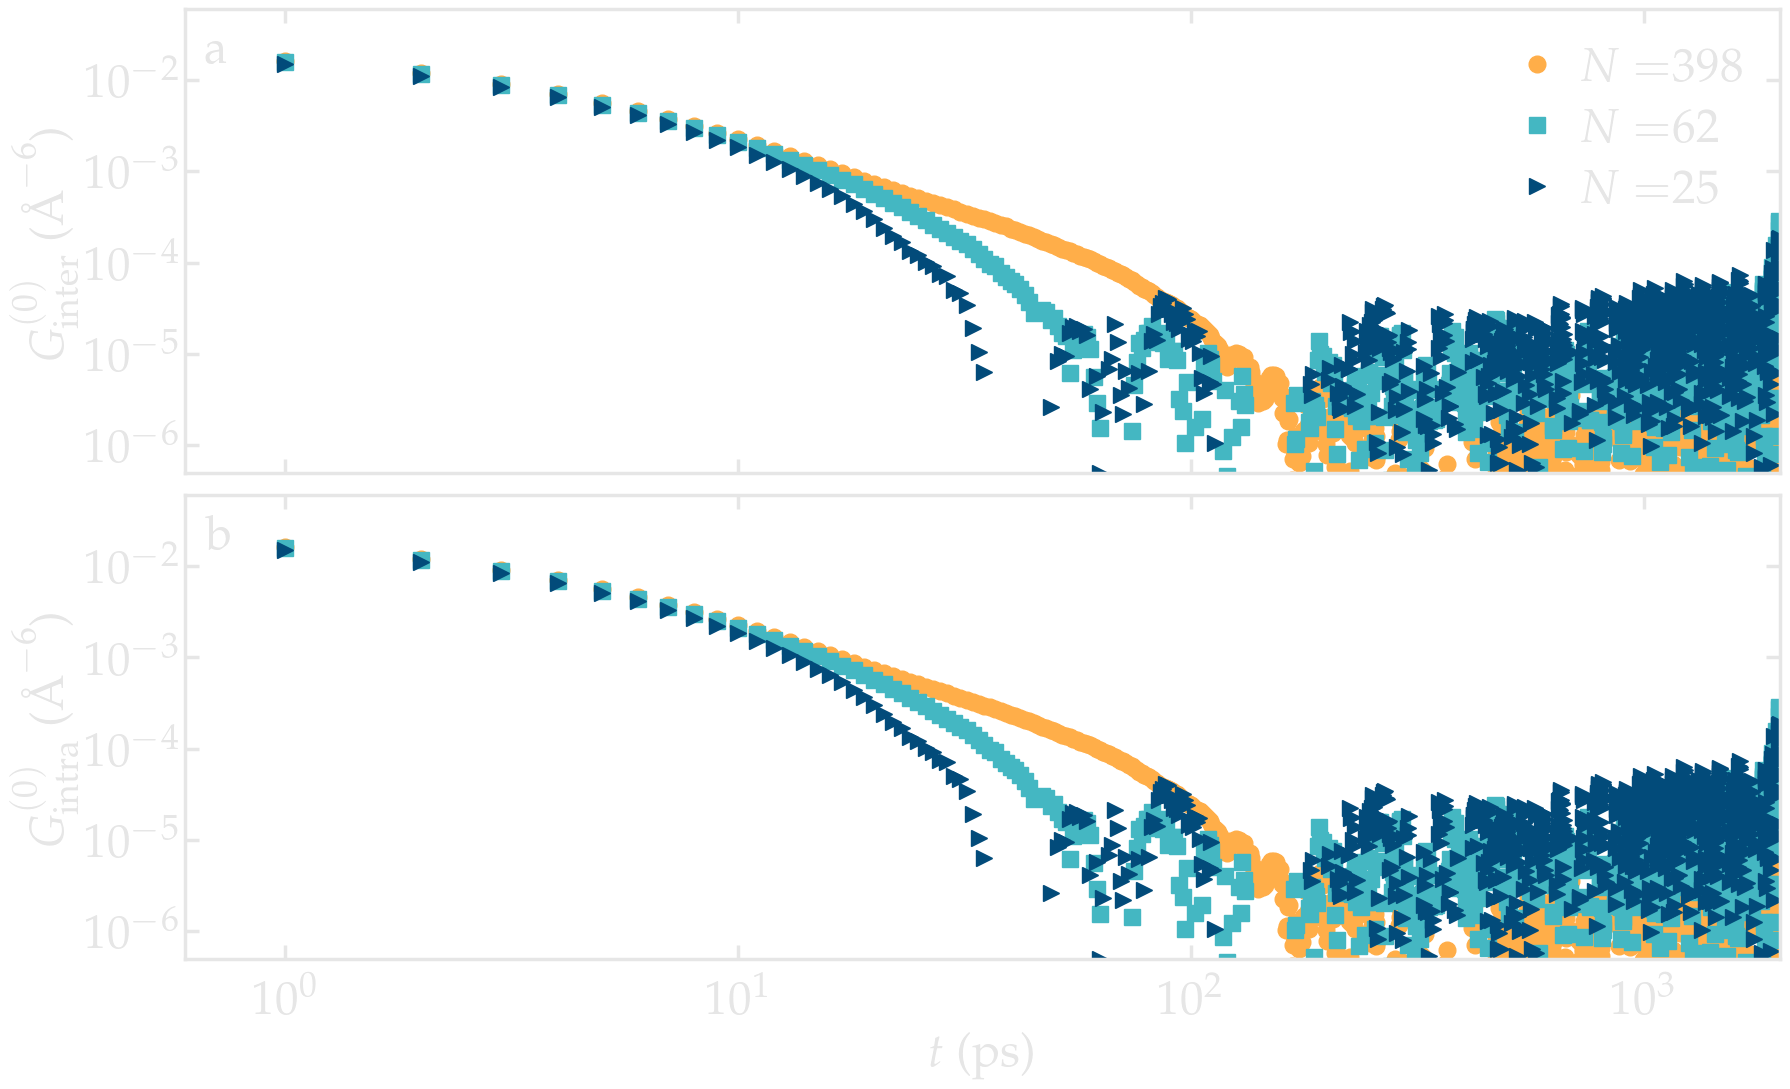

In [21]:
filename = "effect_N_on_G"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = plt.figure(figsize=(18,11))
    ax, n, l_tot, c_tot = [], 0, 2, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    x = np.linspace(0.15, 40)
    id = 6
    ax[-1].loglog(t_vs_N[id], gij_inter_vs_N[id], "o", color=colors["myorange"],
                    markersize = 12, linewidth=4, label=r'$N = $' + str(np.int32(all_N[id])))
    id = 2
    ax[-1].loglog(t_vs_N[id], gij_inter_vs_N[id], "s", color=colors["mycyan"],
                    markersize = 12, linewidth=4, label=r'$N = $' + str(np.int32(all_N[id])))
    id = 0
    ax[-1].loglog(t_vs_N[id], gij_inter_vs_N[id], ">", color=colors["mydarkblue"],
                    markersize = 12, linewidth=4, label=r'$N = $' + str(np.int32(all_N[id])))
    complete_panel(ax[-1], None, r'$G_\mathrm{inter}^{(0)}$ ($\textrm{\AA}^{-6}$)',
                   legend=True, axis_color=mygray, xpad=15)
    set_boundaries(plt, x_boundaries=(0.6, 2e3), y_boundaries=(5e-7, 0.06))
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    x = np.linspace(0.15, 40)
    id = 6
    ax[-1].loglog(t_vs_N[id], gij_inter_vs_N[id], "o", color=colors["myorange"],
                    markersize = 12, linewidth=4, label=r'$N = $' + str(np.int32(all_N[id])))
    id = 2
    ax[-1].loglog(t_vs_N[id], gij_inter_vs_N[id], "s", color=colors["mycyan"],
                    markersize = 12, linewidth=4, label=r'$N = $' + str(np.int32(all_N[id])))
    id = 0
    ax[-1].loglog(t_vs_N[id], gij_inter_vs_N[id], ">", color=colors["mydarkblue"],
                    markersize = 12, linewidth=4, label=r'$N = $' + str(np.int32(all_N[id])))
    complete_panel(ax[-1], r'$t$ (ps)', r'$G_\mathrm{intra}^{(0)}$ ($\textrm{\AA}^{-6}$)',
                   legend=False, axis_color=mygray, xpad=15)
    set_boundaries(plt, x_boundaries=(0.6, 2e3), y_boundaries=(5e-7, 0.06))
    # x_ticks=np.arange(-1, 0.2, 0.2)
    add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(fig, mode, git_path, path_figures, filename)